<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/exporting_latent_codes_pca_t_sne_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title
"""import json
from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.set_image_data_format('channels_first')
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results"""

"import json\nfrom keras.utils.data_utils import get_file\nfrom keras import backend as K\n\nCLASS_INDEX = None\nCLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'\n\n\ndef preprocess_input(x, dim_ordering='default'):\n    if dim_ordering == 'default':\n        dim_ordering = K.set_image_data_format('channels_first')\n    assert dim_ordering in {'tf', 'th'}\n\n    if dim_ordering == 'th':\n        x[:, 0, :, :] -= 103.939\n        x[:, 1, :, :] -= 116.779\n        x[:, 2, :, :] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, ::-1, :, :]\n    else:\n        x[:, :, :, 0] -= 103.939\n        x[:, :, :, 1] -= 116.779\n        x[:, :, :, 2] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, :, :, ::-1]\n    return x\n\n\ndef decode_predictions(preds, top=5):\n    global CLASS_INDEX\n    if len(preds.shape) != 2 or preds.shape[1] != 1000:\n        raise ValueError('`decode_predictions` expects '\n                         'a batch o

## Import Packages

In [3]:
import skimage
import cv2
import os
import numpy as np
from sklearn import manifold, datasets
import pickle as pkl

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
#import imagenet_utils as imu
from keras.applications import imagenet_utils as imu

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [4]:
import cv2 as cv
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [5]:
PATH = '/content/drive/My Drive/aa_images/28-nov/' #@param{type:'string'}

#images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]
#print(len(images))

In [6]:
#@title
"""rootfolder = PATH
file_list = os.listdir(rootfolder)
print(file_list)"""

'rootfolder = PATH\nfile_list = os.listdir(rootfolder)\nprint(file_list)'

In [7]:
#@title
"""file_list_sorted = file_list.sort()
print(file_list_sorted)"""

'file_list_sorted = file_list.sort()\nprint(file_list_sorted)'

In [8]:
#@title
"""
#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'
file_list = []
for i in range(len(os.listdir(rootfolder))):
  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))

print(file_list)"""

"\n#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'\nfile_list = []\nfor i in range(len(os.listdir(rootfolder))):\n  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))\n\nprint(file_list)"

In [9]:
#np.array(file_list)

### Preview

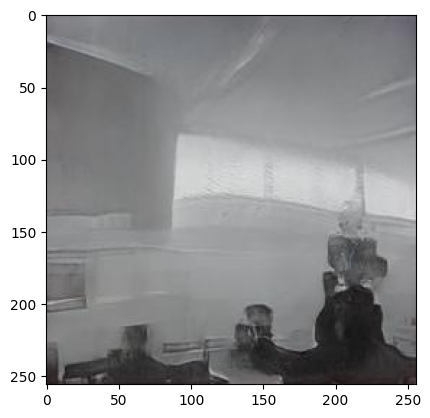

In [10]:
# Initialise the image stack with the first image
img = cv.imread(PATH + '0.jpg') # Mind the naming pattern
#print(img)
plt.imshow(img)

## PCA (principal component analysis)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
import imageio
from skimage import io,transform,color
from skimage import img_as_ubyte
#from sklearn.datasets.base import load_iris
from PIL import Image
import cv2 as cv

In [46]:
num_imgs = 64 #@param{type:'integer'}

In [47]:

img_gray = color.rgb2gray(img) # Convert rgb image to greyscale

3#img_gray = img

# Set the new size for the image
new_size = (256, 256)

# Resize the image
img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)

im_stack = np.asarray(img_gray)

print(str(im_stack) + '__1')


# Concatenate additional images to the stack
for i in range(0, num_imgs):
    img = cv.imread(PATH + str(i) + '.jpg')
    img_gray = color.rgb2gray(img)

    # Set the new size for the image
    new_size = (256, 256)

    # Resize the image
    img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)

    im_array = np.asarray(img_gray)
    im_stack = np.append(im_stack, im_array)
    print(str(im_stack) + '__' + str(i))
    print(len(im_stack))

[[0.40112314 0.33837804 0.28739765 ... 0.30293608 0.20767961 0.26650314]
 [0.22857412 0.28739765 0.27955451 ... 0.25979882 0.30964039 0.44689529]
 [0.47395137 0.5327749  0.43641725 ... 0.23344902 0.34717451 0.45305686]
 ...
 [0.1495098  0.14166667 0.13941176 ... 0.12372549 0.11196078 0.10411765]
 [0.16686275 0.15509804 0.1472549  ... 0.12372549 0.11588235 0.10803922]
 [0.14333333 0.13156863 0.11980392 ... 0.12372549 0.11588235 0.10803922]]__1
[0.40112314 0.33837804 0.28739765 ... 0.18394784 0.21139882 0.25453608]__0
131072
[0.40112314 0.33837804 0.28739765 ... 0.19688902 0.21257529 0.23218314]__1
196608
[0.40112314 0.33837804 0.28739765 ... 0.31033176 0.37307686 0.46327294]__2
262144
[0.40112314 0.33837804 0.28739765 ... 0.64702118 0.62349176 0.69015843]__3
327680
[0.40112314 0.33837804 0.28739765 ... 0.12040706 0.10920784 0.09352157]__4
393216
[0.40112314 0.33837804 0.28739765 ... 0.24394784 0.25571255 0.29492824]__5
458752
[0.40112314 0.33837804 0.28739765 ... 0.13414392 0.12630078 0

In [48]:
# PCA algorithm
def PCA(matrix):
    #matrix = matrix.reshape(-1, 1)
    matrix = np.split(matrix, num_imgs)
    #print(matrix)
    num_comp = 3 #@param{type:'slider', min:0, max:100, step:1}

    pca = dp.PCA(n_components = num_comp) # load the PCA algorithm, set the principal component after dimensionality reduction to n_components
    pca_features = pca.fit_transform(matrix) # dimensionality reduction on raw data
    print(pca_features[0])
    print(pca_features[1])

    for i in range(num_imgs):
        print(pca_features[i])

    return pca_features

#print(img_gray)
low_matrix = PCA(im_stack)

[ 15.6939978   29.13817361 -30.4891907 ]
[-12.43065801  26.6345162   16.95856809]
[ 15.6939978   29.13817361 -30.4891907 ]
[-12.43065801  26.6345162   16.95856809]
[-15.88964259  17.04252117 -13.23174068]
[-24.21445798   0.80424539  -3.93772098]
[46.03561797 12.98345461 -0.97564377]
[36.65766973 18.18672831 17.41714027]
[32.10693158 25.03009358 -3.87913986]
[50.44847228 14.39494576 -1.06993139]
[17.12025238  8.64550426 -0.17521479]
[20.7917878  24.54014257  1.2961013 ]
[38.71821475  9.00501223 -2.73465615]
[ 33.6720859   21.64092445 -19.47572552]
[-26.06011115  15.90591002  -2.26573668]
[14.05423385 21.11036031 -8.28254689]
[18.96980748  2.1349936  41.85356153]
[36.62197461  1.5626693  32.20844911]
[26.34943827  8.92612154 -3.56144841]
[-19.45401727  10.08104154 -10.35201538]
[16.03223929 19.43236126 -0.75949641]
[ 29.05753335 -18.49606739  17.26844461]
[ 39.87993941 -25.62253137 -10.4438832 ]
[ 14.53563847 -30.33838808   4.11414571]
[ 22.53523821 -26.61478686   0.20822064]
[ 17.675680

## T-SNE (t-distributed stochastic neighbor embedding)

In [15]:
import pickle as pkl
import numpy as np
import os
from sklearn import manifold, datasets
import time

_n_dim = 3
_perplexity = 10
_learning_rate = 100
_scale = 1

tsne = manifold.TSNE(n_components=_n_dim, init='pca', random_state=0, perplexity=int(_perplexity), learning_rate=int(_learning_rate))
X_tsne = tsne.fit_transform(low_matrix) # Fit X into an embedded space and return that transformed output.
X_tsne  = X_tsne *_scale
output = X_tsne.tolist()
time=time.time()

for i in range(num_imgs):
    print(output[i])


[65.05704498291016, 34.332210540771484, 121.6678695678711]
[34.38962936401367, 22.160198211669922, 129.05374145507812]
[56.91771697998047, -17.19610023498535, -31.405195236206055]
[33.810585021972656, 63.08448791503906, -53.907493591308594]
[-82.93865966796875, 67.38550567626953, -2.5338127613067627]
[-51.145992279052734, -55.038272857666016, 98.72246551513672]
[0.20293976366519928, -65.53619384765625, 74.07452392578125]
[-38.230064392089844, -93.20552825927734, 69.3805160522461]
[-5.9792351722717285, 0.39526063203811646, 45.277198791503906]
[-3.131824493408203, -34.79130172729492, 95.89064025878906]
[-40.55258560180664, -60.270904541015625, 50.196075439453125]
[28.872364044189453, -63.45589828491211, 53.585330963134766]
[66.97753143310547, 44.706390380859375, -12.597309112548828]
[-9.45471477508545, 0.4727749526500702, 87.92979431152344]
[-1.6988683938980103, -109.24388122558594, -2.3166825771331787]
[-80.00981903076172, -31.245872497558594, 100.05409240722656]
[-14.888689041137695, -

### Simple Visualisation

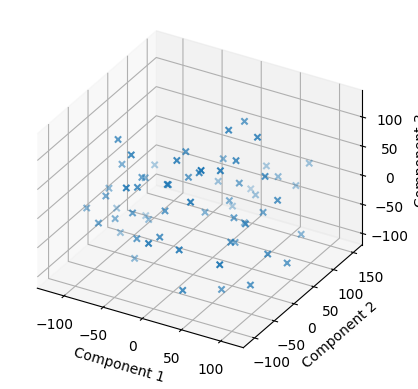

In [16]:
# Plotting the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective (orthographic projection)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker = 'x')
ax.set_proj_type('ortho')  # Setting orthographic projection

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()


[0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209]


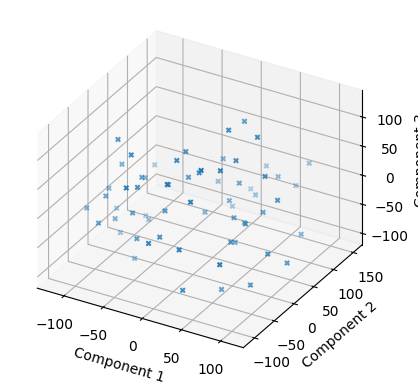

In [45]:
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

# Compute kernel density estimates for each point in the t-SNE data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X_tsne)
densities = kde.score_samples(X_tsne)  # Log density
densities = np.exp(densities)  # Convert log density to actual density
print(densities)

# Scale densities for marker sizes in the plot
density_scale = 10**4  # Scale factor for better visualisation
marker_sizes = densities * density_scale

# Creating the 3D scatter plot with marker sizes based on local kernel density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective, marker sizes based on density
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker='x', s=marker_sizes)

# Setting orthographic projection
ax.set_proj_type('ortho')

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()

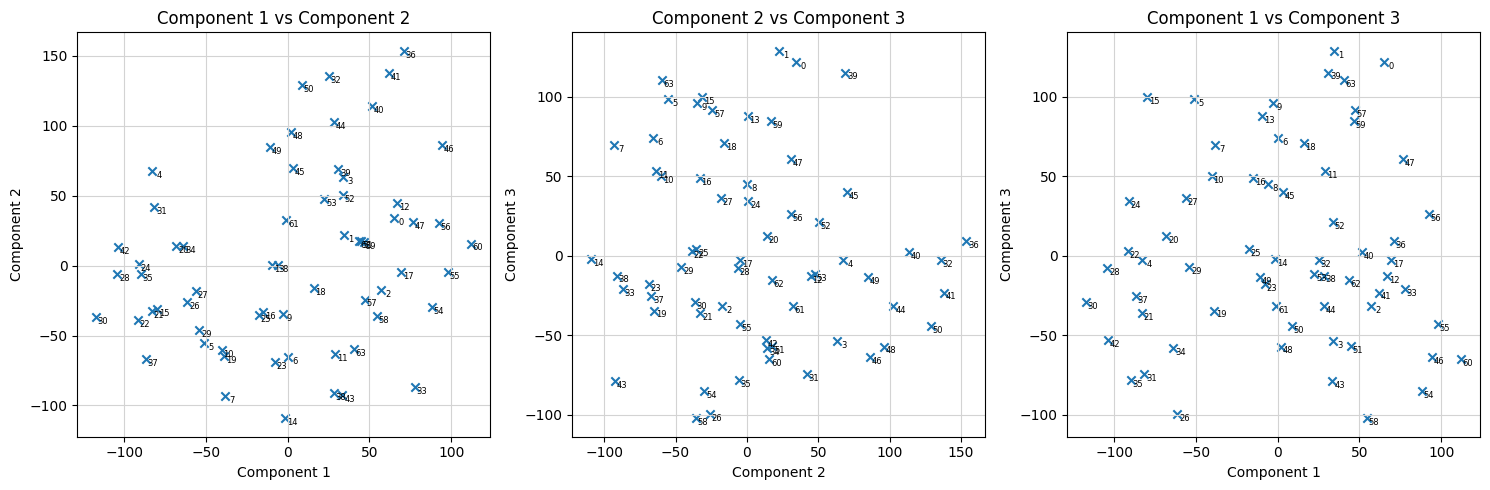

In [17]:
# Adjusting the annotation font size and adding gridlines to the scatter plots

# Re-creating the subplots with smaller font size for annotations and added gridlines
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with smaller font and gridlines
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    ax.scatter(x_data, y_data, marker = 'x')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color = 'lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size

# Component 1 vs Component 2 with annotations
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with annotations
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with annotations
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


[25.52111474 28.26469405 24.21468244 22.51837766  6.9173218  23.96858881
 21.56327081 13.54273154 22.83611688 25.29571338 23.47518391 20.18593003
 23.16267263 22.31986617 10.8305037  25.65847966 25.75545052 23.88283864
 25.50821703 22.39503776 20.36905177 25.15738429 22.60680344 21.26177238
 22.52193128 25.87826484 26.24031583 25.31506862 19.95232802 25.31615326
 14.81522617 12.70255759 12.12652982  6.59939169 19.8775237  23.89812765
  8.1705777  15.80951563 14.73334985 21.51039772 14.26111057 11.06585514
 16.29307749 13.73574037 17.47772737 17.93300165  8.05258919 23.14402147
 15.45142449 13.29938264 11.24271313 28.83947225 24.86107881 24.02667841
 13.84136942 15.25824166 18.00951534 24.15399094 21.19428023 28.80878945
 11.82847313 19.88862728 28.83389032 19.35054788]
[ 9.32810164  8.86712764 29.12713681 18.19969873 19.60419951 17.6004129
 17.93745009 10.19935311 23.36906115 20.38015841 18.4230565  17.86075311
 23.96439507 19.0347152  10.74470773 19.39227369 23.03134651 28.30025138
 2

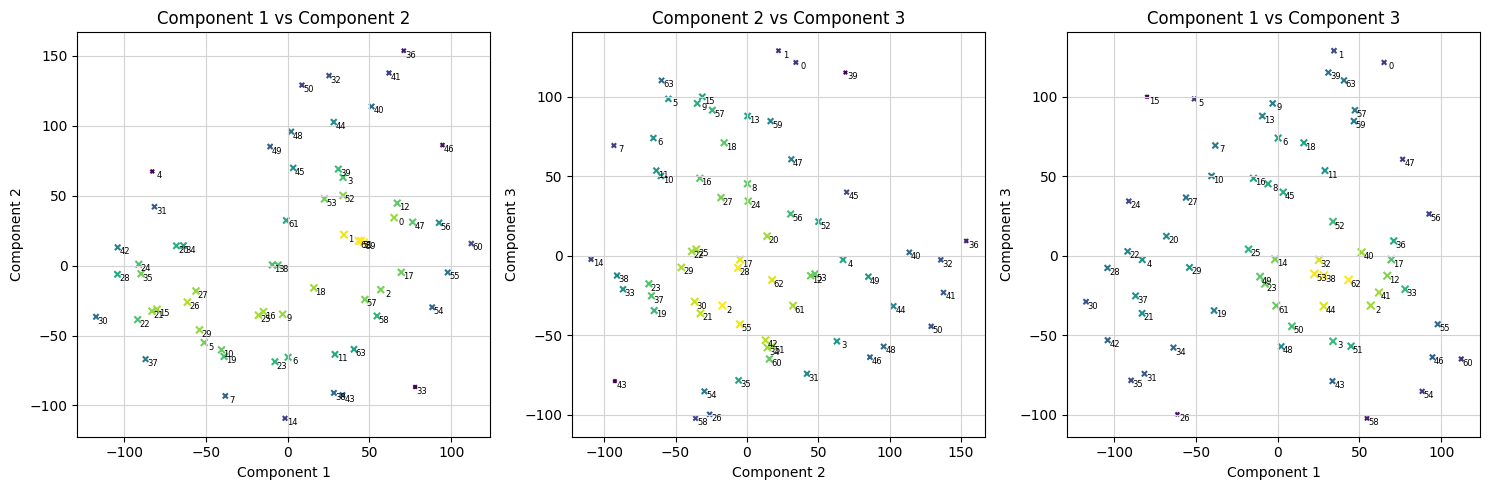

In [44]:
from scipy.stats import gaussian_kde

# Re-creating the subplots with density-based marker sizes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with density-based marker sizes
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    # Calculating the point density
    xy = np.vstack([x_data, y_data])
    scale = 10**6
    z = gaussian_kde(xy)(xy)*scale

    # Scatter plot with density-based marker sizes
    ax.scatter(x_data, y_data, s=z, marker='x', c=z)  # Scaling marker size by density
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color='lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size
    print(z)

# Component 1 vs Component 2 with density-based marker sizes
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


## Save CSV

In [19]:
# Convert the list to an array
my_array = np.array(output)

# Save the array as a CSV file
f_name = 'latent_space_mix' #@param{type:'string'}
np.savetxt(f_name + '.csv', my_array, delimiter=',')

## Save Model

In [20]:
"""
from pathlib import Path
features = np.stack(low_matrix, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/'
fileName = os.path.join(rootfolder2,'pca_pool')
fileObject = open(fileName, 'wb')
pkl.dump(features, fileObject)
fileObject.close()
"""

"\nfrom pathlib import Path\nfeatures = np.stack(low_matrix, axis=0)\n\n# rootfolder2 = Path + '_features'\nrootfolder2 = '/content/drive/My Drive/'\nfileName = os.path.join(rootfolder2,'pca_pool')\nfileObject = open(fileName, 'wb')\npkl.dump(features, fileObject)\nfileObject.close()\n"